In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from clean_df_all import df_total_set, df_in_sample_set, df_training_set, df_test_set, df_out_sample_set

from arma.arma import arma_model


warnings.filterwarnings("ignore")

In [2]:
df_in_sample_set

,SPY US Equity,DIA US Equity,QQQ US Equity
2011-01-03,0.010338,0.006746,0.015608
2011-01-04,-0.000551,0.001976,-0.000814
2011-01-05,0.005198,0.003429,0.008595
2011-01-06,-0.001959,-0.002221,0.003229
2011-01-07,-0.001962,-0.001798,-0.000894
...,...,...,...
2021-01-06,0.005979,0.014383,-0.013852
2021-01-07,0.014857,0.007430,0.024192
2021-01-08,0.005698,0.001739,0.012858
2021-01-11,-0.006741,-0.002797,-0.014450


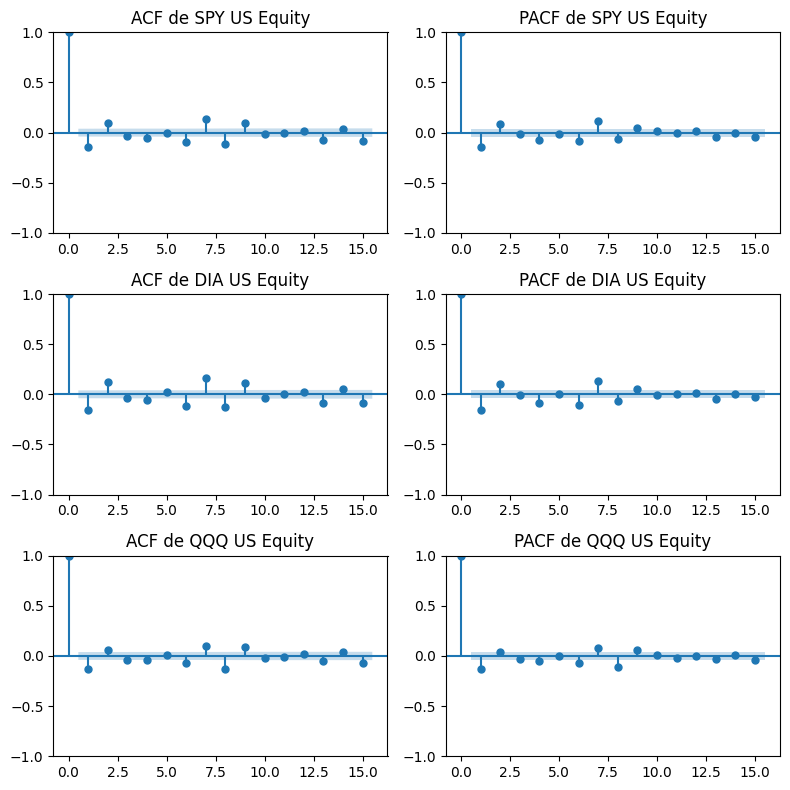

In [3]:
# Crée un sous-plot pour chaque série de prix
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

for i, col in enumerate(df_in_sample_set.columns):
    plot_acf(df_in_sample_set[col].dropna(), ax=axes[i, 0], lags=15)
    plot_pacf(df_in_sample_set[col].dropna(), ax=axes[i, 1], lags=15)
    axes[i, 0].set_title(f"ACF de {col}")
    axes[i, 1].set_title(f"PACF de {col}")

plt.tight_layout()
plt.show()

Mean Squared Error on test set: 7.937394714661469e-05


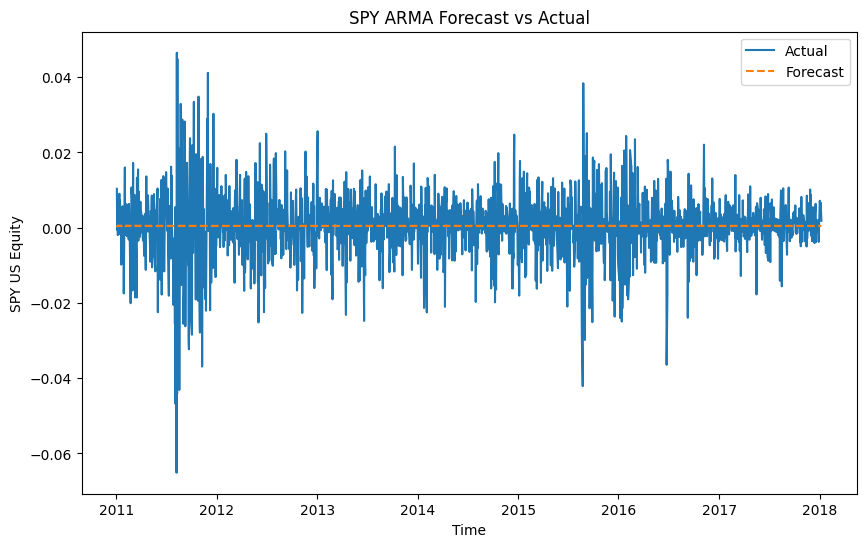

In [4]:
spy_arma = arma_model(df_training_set['SPY US Equity'], (1,1))
dia_arma = arma_model(df_training_set['DIA US Equity'], (1,1))
qqq_arma = arma_model(df_training_set['QQQ US Equity'], (1,1))

# New cell: Forecast predictions and compare with df_test_set
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

n_steps = len(df_training_set)
spy_forecast = spy_arma.forecast(steps=n_steps)

# Get the actual values for SPY from the test set
spy_actual = df_training_set['SPY US Equity']

# Calculate mean squared error
mse = mean_squared_error(spy_actual, spy_forecast)
print("Mean Squared Error on test set:", mse)

# Plot the actual values and the predictions
plt.figure(figsize=(10,6))
plt.plot(spy_actual.index, spy_actual.values, label='Actual')
plt.plot(spy_actual.index, spy_forecast, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('SPY US Equity')
plt.title('SPY ARMA Forecast vs Actual')
plt.legend()
plt.show()

In [3]:
spy_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SPY US Equity   No. Observations:                  502
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1521.244
Date:                Sat, 03 May 2025   AIC                          -3034.487
Time:                        15:51:42   BIC                          -3017.613
Sample:                             0   HQIC                         -3027.867
                                - 502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.596      0.551      -0.001       0.001
ar.L1         -0.0357      0.390     -0.092      0.927      -0.800       0.729
ma.L1         -0.0357      0.396     -0.090      0.928      -0.813       0.741
sigma2         0.0001   5.93e-06     23.014      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               306.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
spy_arma = arma_model(df_training_set['SPY US Equity'], (1,1))
dia_arma = arma_model(df_training_set['DIA US Equity'], (1,1))
qqq_arma = arma_model(df_training_set['QQQ US Equity'], (1,1))

In [12]:
spy_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SPY US Equity   No. Observations:                  502
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1521.244
Date:                Sat, 03 May 2025   AIC                          -3034.487
Time:                        15:45:34   BIC                          -3017.613
Sample:                             0   HQIC                         -3027.867
                                - 502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.596      0.551      -0.001       0.001
ar.L1         -0.0357      0.390     -0.092      0.927      -0.800       0.729
ma.L1         -0.0357      0.396     -0.090      0.928      -0.813       0.741
sigma2         0.0001   5.93e-06     23.014      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               306.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
spy_test = spy_arma

In [9]:
spy_test

2011-01-03    0.000308
2011-01-04   -0.000406
2011-01-05    0.000344
2011-01-06   -0.000040
2011-01-07    0.000458
                ...   
2012-12-24    0.001463
2012-12-26    0.000591
2012-12-27    0.000641
2012-12-28    0.000437
2012-12-31    0.001107
Name: predicted_mean, Length: 502, dtype: float64